Project: Churn Prediction


I am using metrics from users to quantify: 
* How likely they are to churn, 
* Who is most likely to churn and 
* Possible reasons why they are most likely to churn

I aim to provide businesses with the foresight they need to have to retain existing clients

Step 1: Reading Files into Python

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#First 5 instances of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Last 5 instances of the dataset 
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#Finding out the shape of the dataset to be worked on 
df.shape

(7043, 21)

In [6]:
#Checking all the columns in the dataset 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Step 2: Variable Identification and Typecasting

In [7]:
#A closer look at the distribution of data types in the dataset 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see alot of "object" data types, this means pandas wasnt able to detect what data types they are and it is up to me to change the data type for accurate analysis/training

I am going to look at separate datatypes at once, so we have int64, float64, and objects for now

In [8]:
#Identifying variables with integer datatype
df.dtypes[df.dtypes == 'int64']

SeniorCitizen    int64
tenure           int64
dtype: object

Summary: 
* SeniorCitizen represents whether a citizen is a senior or not, binary hence this should be converted to a category

* Tenure represents the amount of time a user has been on our platform, it is okay as an integer

In [9]:
#converting senior citizen to a category
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

Float Data Type

In [10]:
df.dtypes[df.dtypes == 'float64']

MonthlyCharges    float64
dtype: object

Summary: 
* Monthly charges is monetary, hence it can be decimal

Object Data Type

In [11]:
df.dtypes[df.dtypes == 'object']


customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [12]:
dict = df.columns[df.dtypes == 'object']

In [13]:
for value in dict:

    print (value, df[f'{value}'].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


Summary: 
* CustomerID is a unique identifier for customers, this is alphanumeric hence I am changing its type to [StringDtype]
* Gender,partner,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV, StreamingMovies, Contract, PaperlessBilling , PaymentMethod, Churn  and dependents are categorical, hence I am changing their types to [Category]
* Total charges is monetary, hence I am changing its type to [Float]

In [14]:
#Changing CustomerID datatype
df['customerID'] = df['customerID'].astype('string')

In [15]:
#changing total charges datatype 
df['TotalCharges']=df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

Changing Categorical Data

In [16]:
#Since all the remaining columns under the "object" class are now categories, I will isolate them and loop through to typecast them
columns = df.columns[df.dtypes == 'object']

In [17]:
for column in columns: 
    df[f'{column}'] = df[f'{column}'].astype('category')

In [18]:
df.dtypes

customerID          string[python]
gender                    category
SeniorCitizen             category
Partner                   category
Dependents                category
tenure                       int64
PhoneService              category
MultipleLines             category
InternetService           category
OnlineSecurity            category
OnlineBackup              category
DeviceProtection          category
TechSupport               category
StreamingTV               category
StreamingMovies           category
Contract                  category
PaperlessBilling          category
PaymentMethod             category
MonthlyCharges             float64
TotalCharges               float64
Churn                     category
dtype: object

### Univariate Analysis

Univariate Analysis: Numerical Variables

The goal of this is to summarize patterns and trends in individual variables, this should help when choosing a fillNa strategy and for further analyses

In [19]:
#Segmenting Numerical Datatypes
df.select_dtypes(include = ['int64', 'float64']).dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [20]:
#seggregating the variables 
tenure = df['tenure']
MonthlyCharges = df['MonthlyCharges']
TotalCharges = df['TotalCharges']

In [21]:
tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

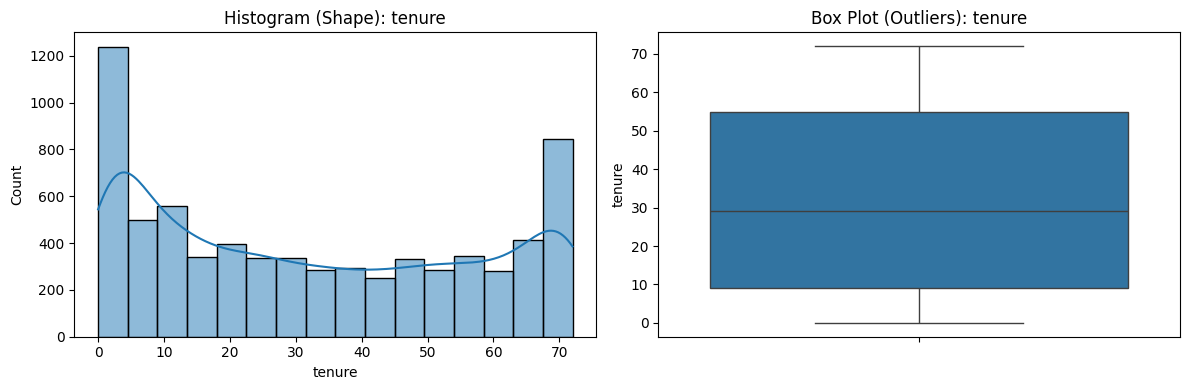

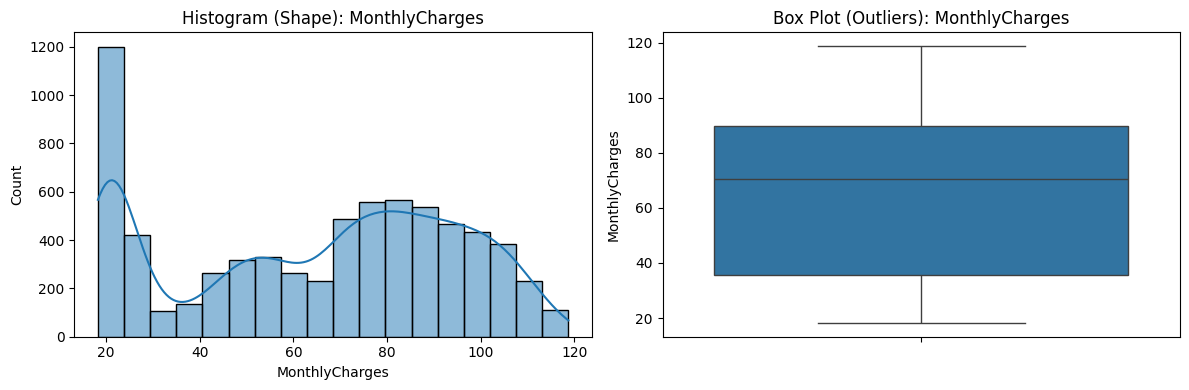

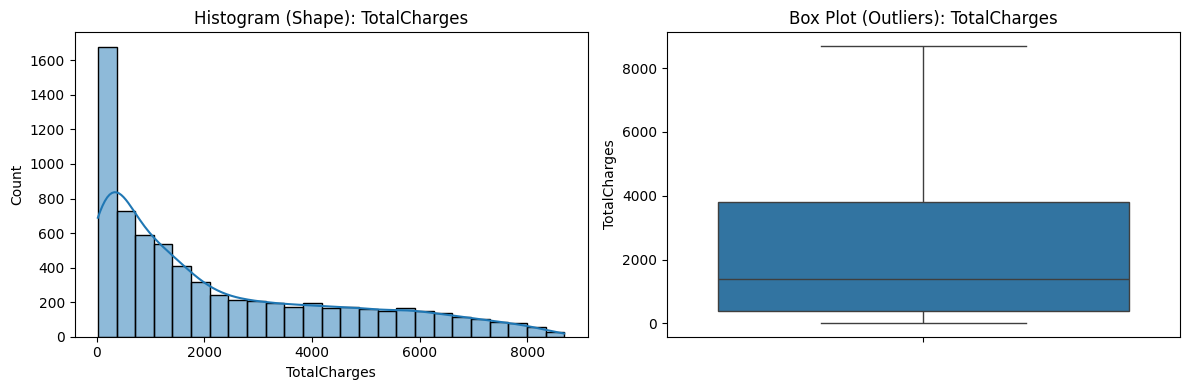

In [22]:
#plotting the distributions of all numerical colums
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde = True)
    plt.title(f'Histogram (Shape): {col}')

    plt.subplot(1,2,2)
    sns.boxplot(y = df[col])
    plt.title(f'Box Plot (Outliers): {col}')

    plt.tight_layout()
    plt.show

Summary: 
* Tenure: This is a U shape, as is typical with subscription data, this is saying that when users get through the initial gutting, then they are very likely to stay for the long haul with fairly stable numbers in the middle and the bunching up of loyal customers at the end. No real outliers too

* Monthly Charges: this Bimodial graph showcases very high customer segmentation with most users either using bare bones plans or the most expensive ones 

* Total Charges: This shows that there are alot of new users, and this represents skew, which is something we will have to work on

In [23]:
#Logarithmic normalization on the total charges column due to the large amount of skew
df['TotalCharges_Log'] = np.log1p(df['TotalCharges'])

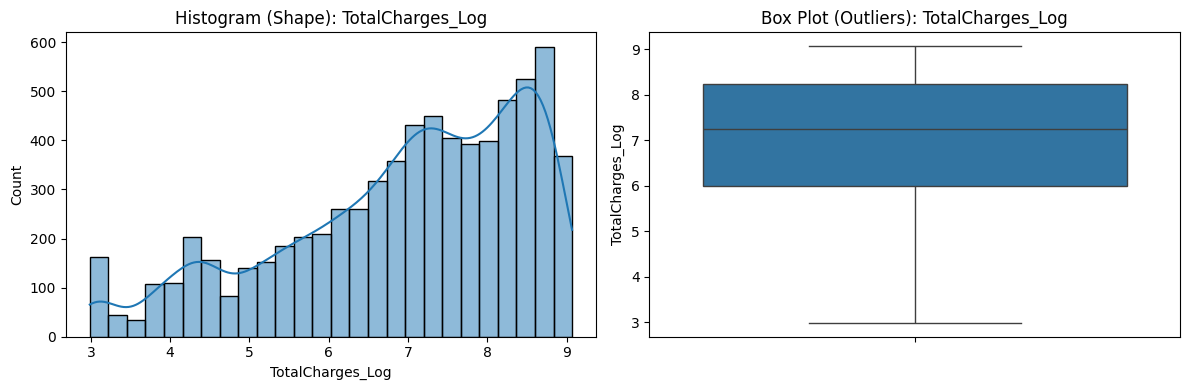

In [24]:
#plotting the distributions of the log normalized TotalCharges
numerical_cols = ['TotalCharges_Log']
for col in numerical_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde = True)
    plt.title(f'Histogram (Shape): {col}')

    plt.subplot(1,2,2)
    sns.boxplot(y = df[col])
    plt.title(f'Box Plot (Outliers): {col}')

    plt.tight_layout()
    plt.show

Summary: 

The newly transformed value is now more robust and more ready to be used for further analysis and model training

In [25]:
#Imputing NA values with 0 
df['TotalCharges_Log'] = df['TotalCharges_Log'].fillna(0)

In [26]:
df['TotalCharges_Log'].isna().value_counts()

TotalCharges_Log
False    7043
Name: count, dtype: int64

Univariate Analysis: Categorical Values

In [27]:
df.dtypes[df.dtypes == 'category']

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Churn               category
dtype: object

In [28]:
#Bringing out the number distribution of Churn
df['Churn'].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [29]:
#Data preparation for visualization
churn_data = df['Churn'].value_counts(normalize=True).reset_index()
churn_data.columns = ['Churn_Status', 'Proportion']

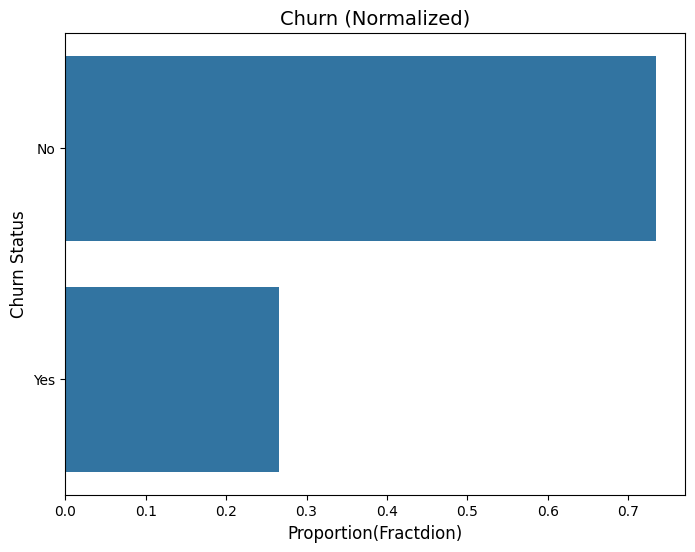

In [30]:
#Churn Visualization
plt.figure(figsize=(8,6))
sns.barplot(
    x = 'Proportion', 
    y = 'Churn_Status', 
    data = churn_data, 
    orient = 'h')
plt.title('Churn (Normalized)', fontsize = 14)
plt.xlabel('Proportion(Fractdion)', fontsize = 12)
plt.ylabel('Churn Status', fontsize = 12)

plt.show()

Summary: 

The amount of people that churned are about 1/4th those that didnt. This is to be fixed when normalizing in the ML phase, SMOTE

In [31]:
#I dropped the CustomerID tab because it is unique and does not give us any usable information for analysis/modelling
df = df.drop('customerID', axis = 1)

In [32]:
categorical_columns = df.select_dtypes(include = ['category'])
cols_to_exclude = ['Churn']

categorical_columns = categorical_columns.drop('Churn', axis = 1)


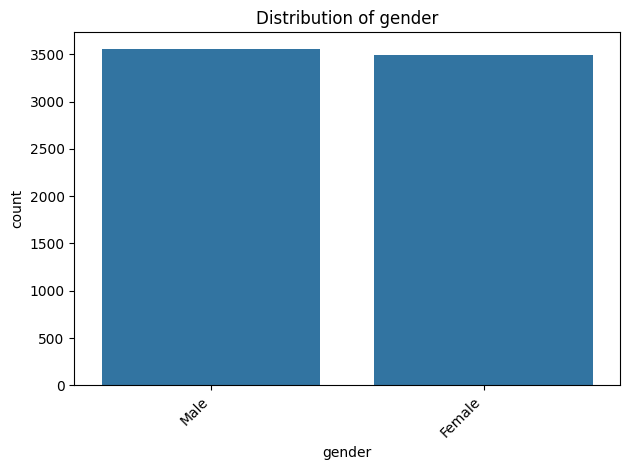

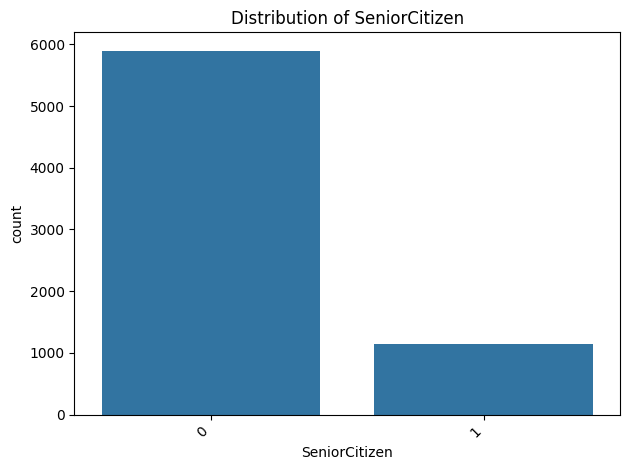

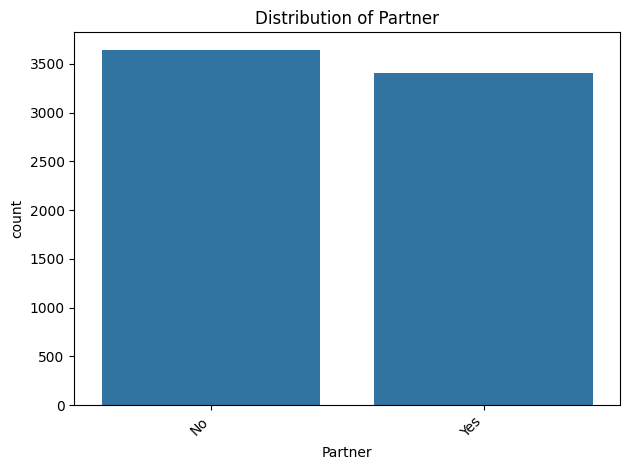

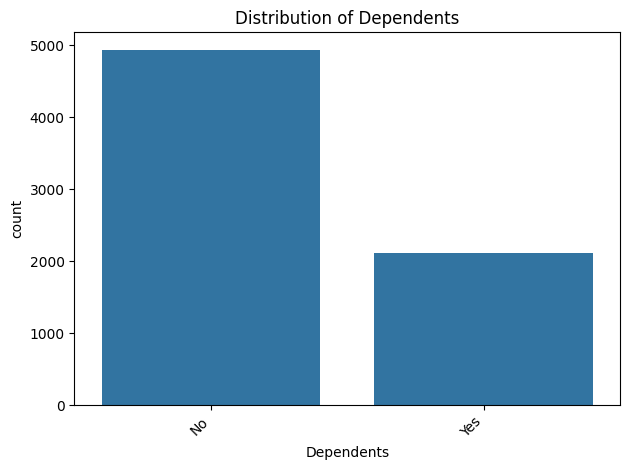

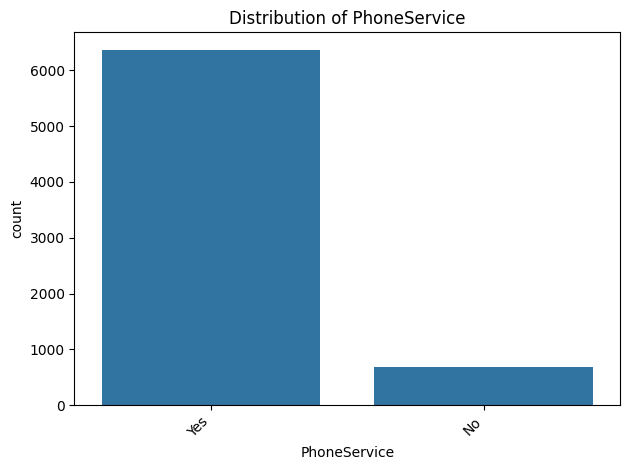

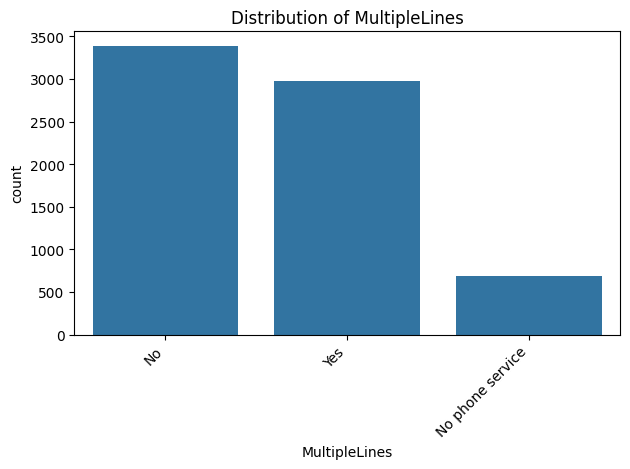

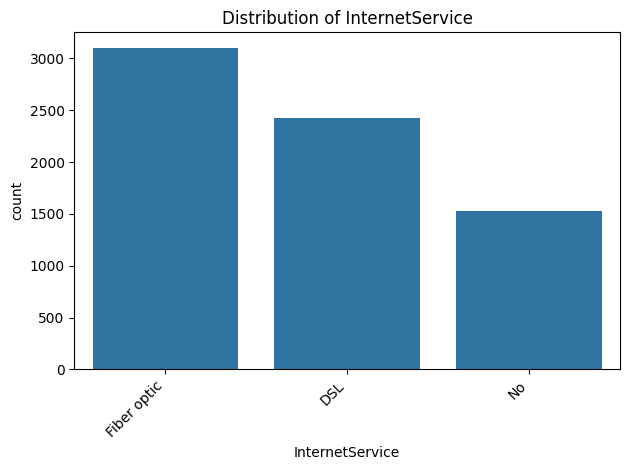

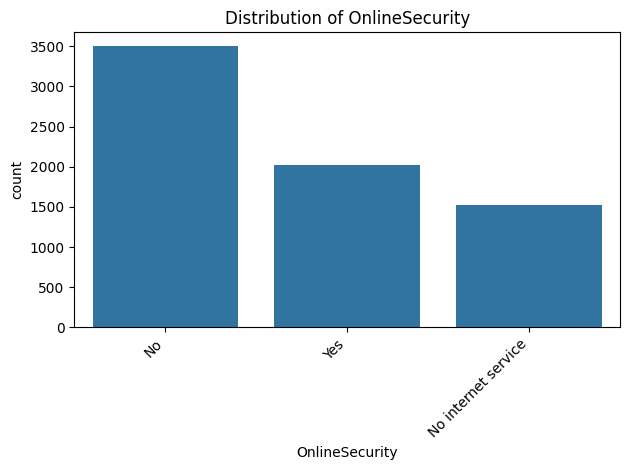

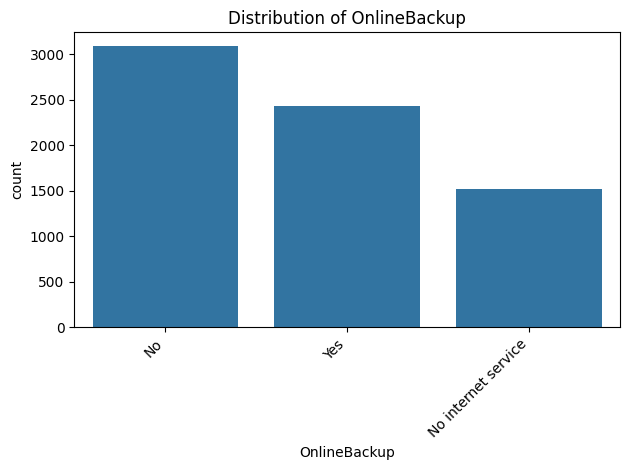

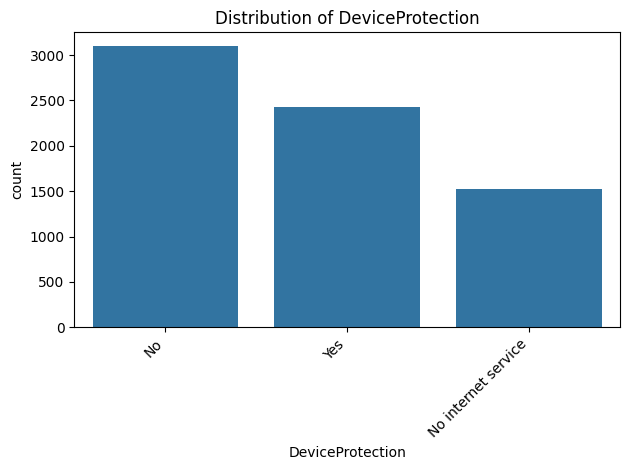

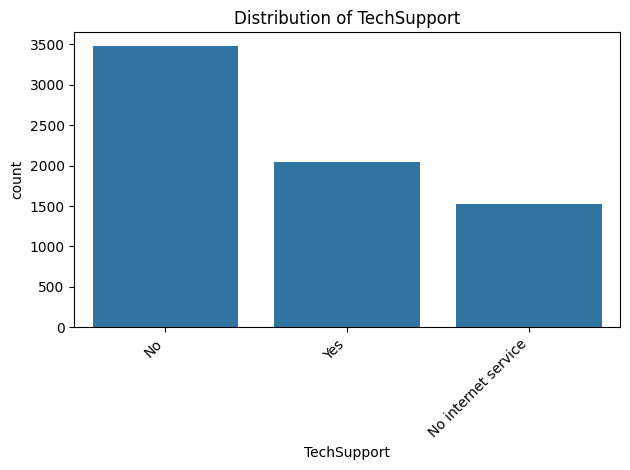

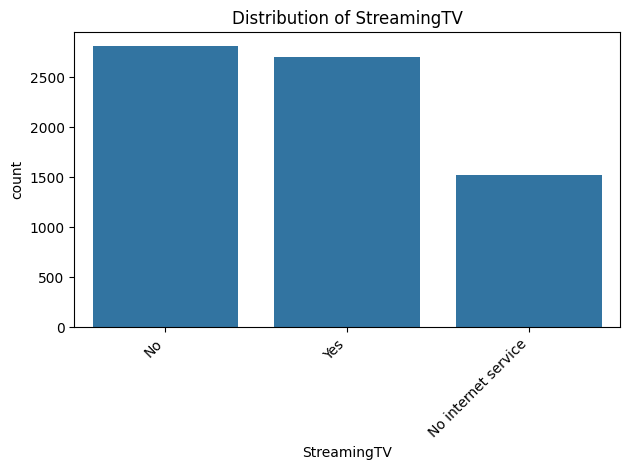

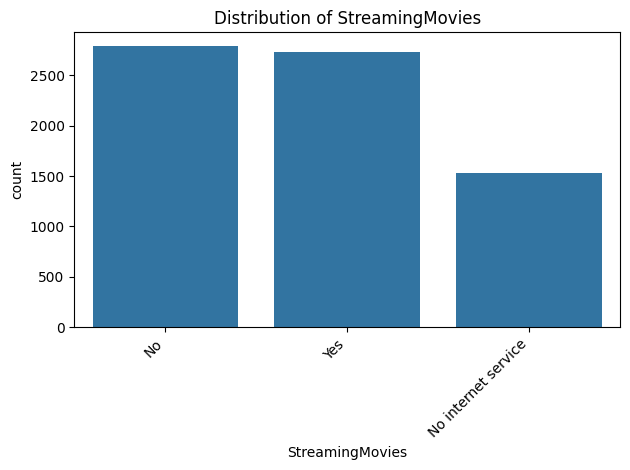

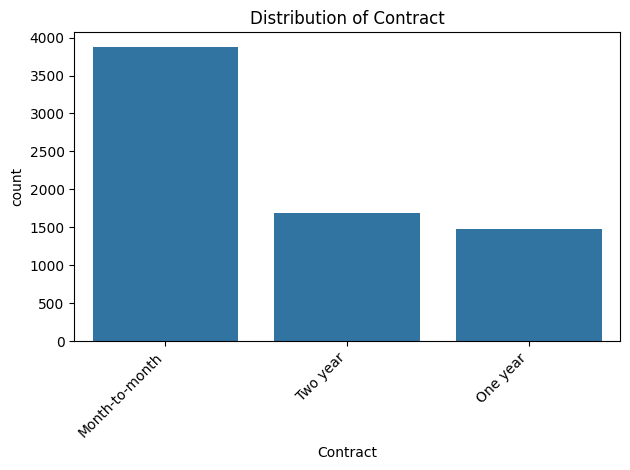

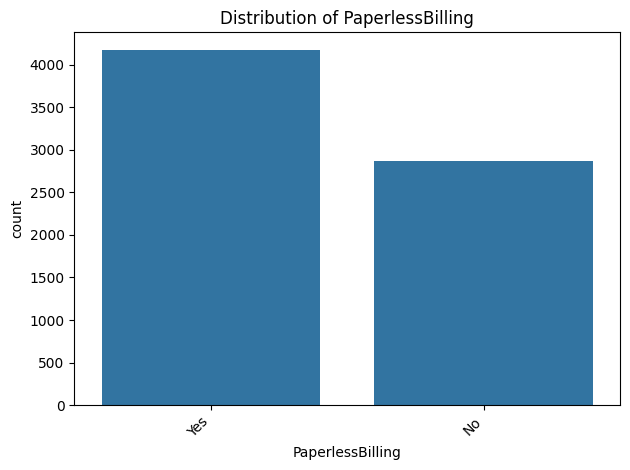

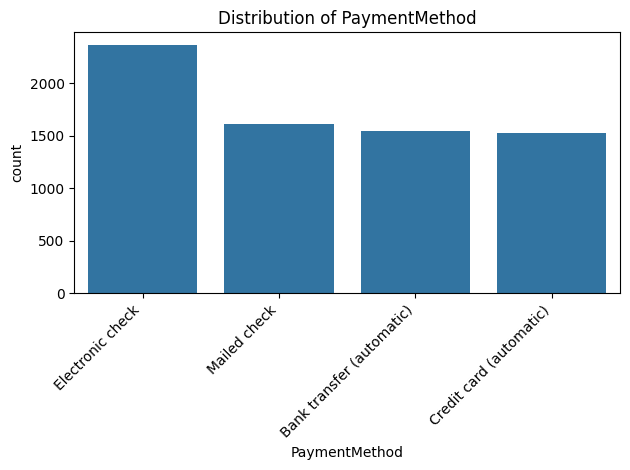

In [33]:
for column in categorical_columns:
    plt.Figure(figsize=(3,1))
    sns.countplot(
        data=df,
        x = column,
        order = df[column].value_counts().index
    )
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() 

Summary: 

* Gender is very well distributed, the customer base has nearly equal amounts of males and females with slightly more males 

* There are way more non senior citizens than there are seniors, and that is to be expected

* The distribution of those with partners is also well distributed with slightly more people having no partners 

* We have more people with no dependents as of now, with a higher proportion of our users being non senior, this is to be expected 

* almost 90% of people are subscribed to our phone service 

* Majority of people have single lines, but the difference in proportion between it and the people that dont is not much, and we have a very small amount of people who have no phone service 

* Most people use the fiber optic offering, followed by DSL with a third category, the people who do not have internet with us. This amount is higher than in the ones with lines which suggests there are some people who use our sims just for calls 

* A vast majority of the customers do not subscribe to Online Security offering, with there being approx 50% less that do subscribe to the online security offering, this being very close to the distribution of those with no internet service at all 

* Online backup has a slightly better distribution than the above, however we still have more people who opted out of this rather than in 

* The same distribution above is seen here in the Device protection and Tech Support offerings

* Amongst the users subscribed to the internet service, it is very well balanced between people who are opted in and out of Streaming TV with slightly more people opting out 

* The above distribution also shows itself in the Movie Streaming offering

* A vast majority of our users are on a month to month contract, and the distribution between one year and two year is almost equal, with two year contracts selling slightly more than one year, maybe there is an offering for two years which makes it worth more than one year but less than the time freedom of the m2m contract 

* A majority of our users use paperless billing, around 4000 users

* Electronic check is the most popular payment method by a distane with mailed check, bank transfer (automatic) and credit card (automatic) having relatively equal amounts of users 

From our Univariate Analysis, we have some hypotheses that can be tested

Categorical
* The relationship between additional options and churn
* The relationship between contract duration and churn 
* The relationship between payment choices and churn
* Internet Service type vs Churn 

Numerical 
* The relationship between Tenure and Churn 
* The relationship between Monthly charges and churn

### BiVariate Analysis: 

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log'],
      dtype='object')

In [35]:
print(pd.crosstab(df['Contract'], df['Churn'], normalize = 'index'))

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


In [36]:
#Encoding the churn column for visualization 
df['Churn_numeric'] = df['Churn'].replace({
    'Yes' : 1,
    "No" : 0
    }).astype(float)

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\2382527857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn_numeric'] = df['Churn'].replace({
C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\2382527857.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Churn_numeric'] = df['Churn'].replace({


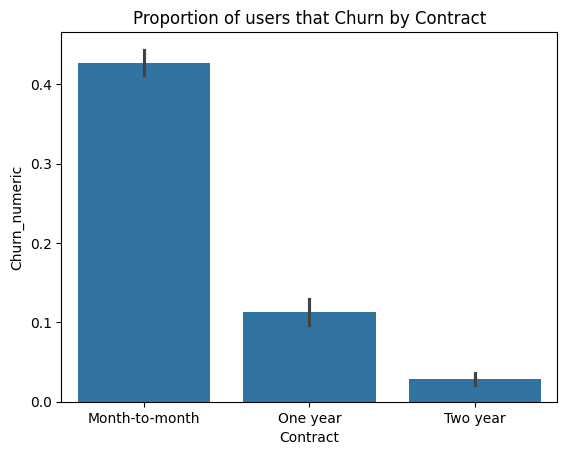

In [37]:
plt.Figure(figsize=(6,4))
sns.barplot(
    data = df,
    x = 'Contract',
    y = 'Churn_numeric'
)
plt.title(f'Proportion of users that Churn by Contract')
plt.show()

Summary: 

Month to Month users Churn almost 4X as much as the next closest contract length. HOWEVER from above univariate analysis, M2M users also have the most members about 2x, so 2x users but 4x as much churn. There is an imbalance there 


In [38]:
additional_options = ['InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

In [39]:
mapping = {
    'Yes': 1, 
    'DSL': 1, 
    'Fiber optic': 1,
    'No': 0, 
    'No internet service': 0 
}



In [40]:
temp_df = df[additional_options].replace(mapping)

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\1024044329.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = df[additional_options].replace(mapping)
C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\1024044329.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  temp_df = df[additional_options].replace(mapping)
C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\1024044329.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.i

In [41]:
temp_df = temp_df.astype(int)

In [42]:
df['Total_additional_Options'] = temp_df.sum(axis = 1)

In [43]:
print(pd.crosstab(df['Churn'], df['Total_additional_Options'], normalize = 'index'))

Total_additional_Options         0         1         2         3         4  \
Churn                                                                        
No                        0.273096  0.063974  0.101276  0.128141  0.156939   
Yes                       0.060460  0.193686  0.236490  0.197967  0.163724   

Total_additional_Options         5         6         7  
Churn                                                   
No                        0.127947  0.096637  0.051991  
Yes                       0.101659  0.037988  0.008026  


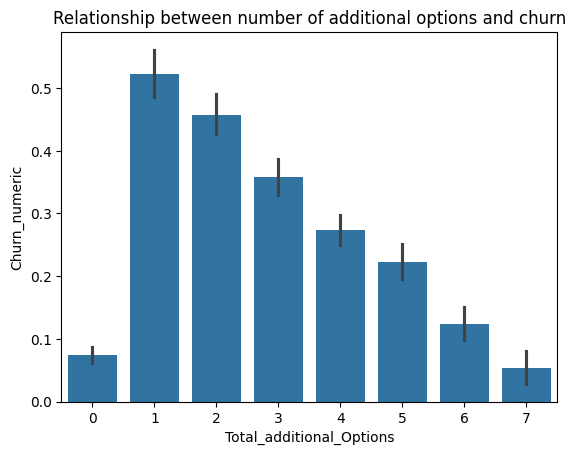

In [44]:
plt.Figure(figsize=(6,4))
sns.barplot(
    data = df,
    x = 'Total_additional_Options',
    y = 'Churn_numeric'
)
plt.title(f'Relationship between number of additional options and churn')
plt.show()


Summary: 

The Majority of the people who churn have an additional service, now I want to check if this is just being bloated by the inclusion of the internet service column, I will check the relationship between internet service and churn

In [45]:
#Checking the relationship between internet service and churn
pd.crosstab(df['InternetService'], df['Churn'], normalize = 'index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


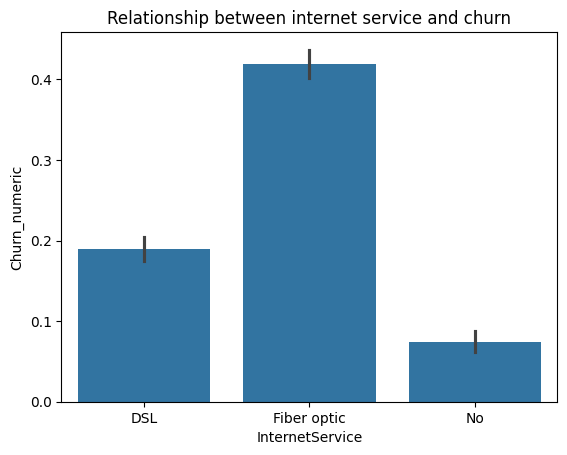

In [46]:
plt.Figure(figsize=(6,4))
sns.barplot(
    data = df,
    x = 'InternetService',
    y = 'Churn_numeric'
)
plt.title('Relationship between internet service and churn')
plt.show()

Summary: 

The Fiber Optic users have significantly more churn in terms of proportion than the rest, with over 40% of its users churning, now my thought is with this big gap, what if this skewed the above plot on additional services to churn, I will try to create a new plot without internet service as an  additional service just to be sure and then we compare both 

In [47]:
additional_options_noInternet = ['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

mapping = {
    'Yes': 1, 
    'DSL': 1, 
    'Fiber optic': 1,
    'No': 0, 
    'No internet service': 0 
}

temp_df = df[additional_options_noInternet].replace(mapping).astype(int)

df['Total_additional_Options_2'] = temp_df.sum(axis = 1)

print(pd.crosstab(df['Churn'], df['Total_additional_Options'], normalize = 'index'))


Total_additional_Options         0         1         2         3         4  \
Churn                                                                        
No                        0.273096  0.063974  0.101276  0.128141  0.156939   
Yes                       0.060460  0.193686  0.236490  0.197967  0.163724   

Total_additional_Options         5         6         7  
Churn                                                   
No                        0.127947  0.096637  0.051991  
Yes                       0.101659  0.037988  0.008026  


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3065863783.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = df[additional_options_noInternet].replace(mapping).astype(int)
C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3065863783.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  temp_df = df[additional_options_noInternet].replace(mapping).astype(int)
C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3065863783.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

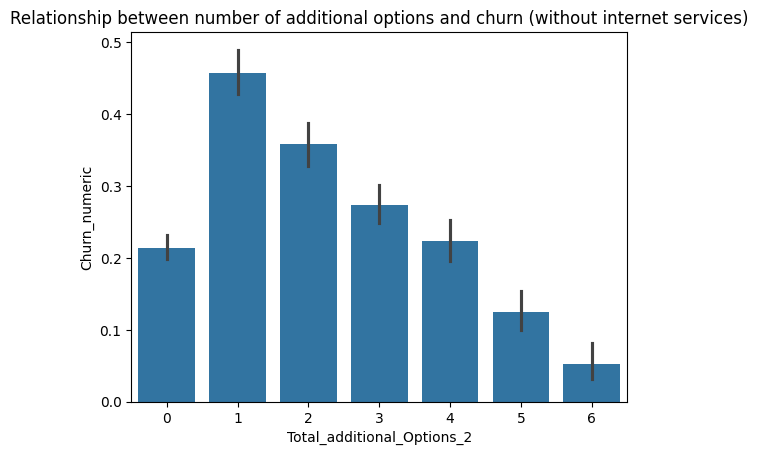

In [48]:
plt.Figure(figsize=(6,4))
sns.barplot(
    data = df,
    x = 'Total_additional_Options_2',
    y = 'Churn_numeric'
)
plt.title(f'Relationship between number of additional options and churn (without internet services)')
plt.show()


Summary: 

There is still a sizable difference in the members who churned with only 1 additional option as opposed to others, I did notice however that the number of people with 0 additional options had an increase in proportion (maybe from internet service no longer being recognized as an option)

so, with internet service no longer at "fault" for the big discrepancy, I will now check the churn rates for every exact additional option

In [49]:
#Creating a new df for just internet users for further analysis
df_internet_users = df[df['InternetService'] != 'No']

Churn                 No       Yes
OnlineSecurity                    
No              0.582333  0.417667
Yes             0.853888  0.146112


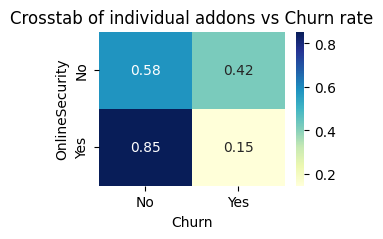

Churn               No       Yes
OnlineBackup                    
No            0.600712  0.399288
Yes           0.784685  0.215315


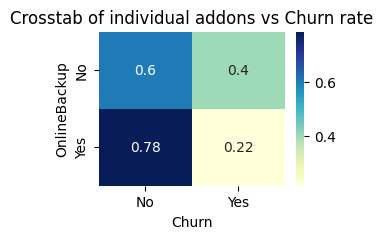

Churn                   No       Yes
DeviceProtection                    
No                0.608724  0.391276
Yes               0.774979  0.225021


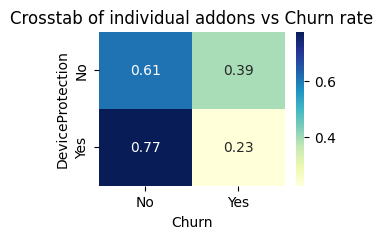

Churn              No       Yes
TechSupport                    
No           0.583645  0.416355
Yes          0.848337  0.151663


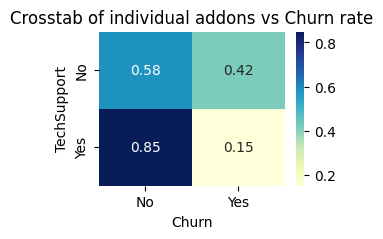

Churn              No       Yes
StreamingTV                    
No           0.664769  0.335231
Yes          0.699298  0.300702


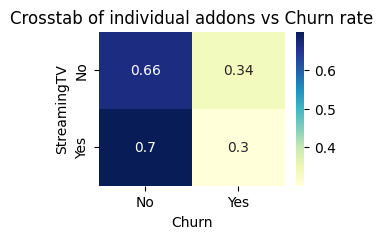

Churn                  No       Yes
StreamingMovies                    
No               0.663196  0.336804
Yes              0.700586  0.299414


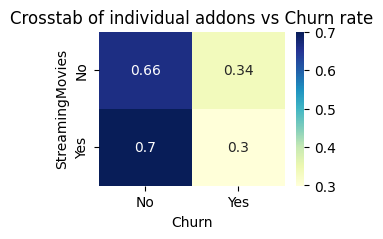

In [50]:
individual_addons = ['OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']


for value in individual_addons:
    crosstab_table = pd.crosstab(df_internet_users[f'{value}'], df_internet_users['Churn'], normalize = 'index')
    print(crosstab_table)
    plt.figure(figsize=(3,2))
    sns.heatmap(
       crosstab_table,
       annot = True,
       cmap= 'YlGnBu'
    )
    plt.title('Crosstab of individual addons vs Churn rate')
    plt.show()
   


Summary: 

From the above information, there doesnt seem to be any "high value addons" with all categories having modest churn rates, however I noticed that people who did not subscribe to Tech protection, device backup and online security were 40% likely to churn

I will check if these services really retain customers below 

In [51]:
sticky_services= ['TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity']
mapping_bundle = {'Yes': 1, 'No': 0, 'No internet service': 0}

df_sticky_services = df[sticky_services]

temp_df = df_sticky_services.replace(mapping_bundle).astype(int)

df['StickinessScore'] = temp_df.sum(axis=1)

print(df[['TechSupport', 'DeviceProtection', 'OnlineBackup','OnlineSecurity','StickinessScore']].head())


  TechSupport DeviceProtection OnlineBackup OnlineSecurity  StickinessScore
0          No               No          Yes             No                1
1          No              Yes           No            Yes                2
2          No               No          Yes            Yes                2
3         Yes              Yes           No            Yes                3
4          No               No           No             No                0


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\1512796216.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = df_sticky_services.replace(mapping_bundle).astype(int)
C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\1512796216.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  temp_df = df_sticky_services.replace(mapping_bundle).astype(int)
C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\1512796216.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

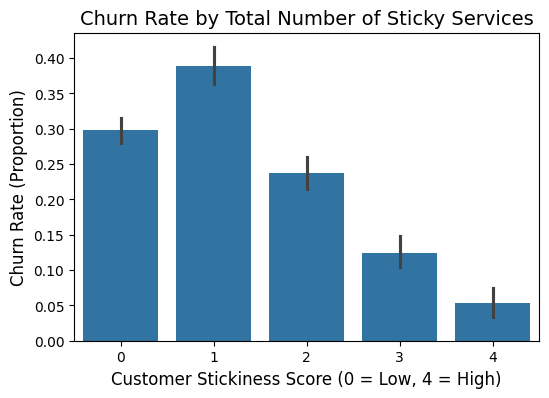

In [52]:
plt.figure(figsize=(6,4))
sns.barplot(
    data = df,
    x = 'StickinessScore',
    y = 'Churn_numeric'
)
plt.title('Churn Rate by Total Number of Sticky Services', fontsize=14)
plt.xlabel('Customer Stickiness Score (0 = Low, 4 = High)', fontsize=12)
plt.ylabel('Churn Rate (Proportion)', fontsize=12)
plt.show()

Summary: 

From the above plot, we can see that the average churn rate between people that had 0 or 1 sticky services is 0.35 and then from 2 it drops sharply to 0.25 and then 0.10 and then around 0.05. This proves that the most valuable services are the protective ones, but now that leads to a question: What type of customer gets these services? the m2m or the yearly or 2 year etc which will be tested when working on multivariate analysis

Now, I will work on payment choices vs churn 

In [53]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize = 'index')

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [54]:
temp_df = df
mapping = {
    'Bank transfer (automatic)' : 'BT',
    'Credit card (automatic)' : 'CC',
    'Electronic check' : 'E-Check',
    'Mailed check' : 'M-Chec'
}

temp_df['PaymentMethod'] = temp_df['PaymentMethod'].replace(mapping)

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\1728347946.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  temp_df['PaymentMethod'] = temp_df['PaymentMethod'].replace(mapping)


<Axes: xlabel='PaymentMethod', ylabel='Churn_numeric'>

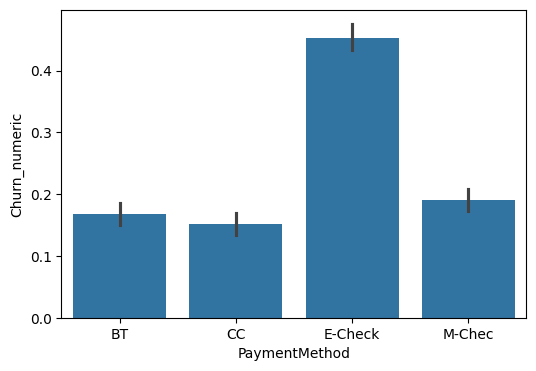

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(
    data = temp_df,
    x= 'PaymentMethod',
    y = 'Churn_numeric'
)

Summary: 

From the above, customers who use the E-Check method of payment churns the most (about 40% of users who use the E check method churn) and the two lowest are bank transfers and credit card payments (both automatic), however the difference between them and mailed checks isnt much

With the mailed checks also having a lower churn rate, this leads me to believe the customer segment using the e checks might be the high risk users not necessarily the method 

Hypothesis to test: what type of users use the e-check (knowing we already have one high risk base M2M) and a relatively safer base (The ones who bought more addons). This will gauge their commitment 

Moving on to Numerical Bi-variate analysis, we are testing: 

1. Tenure vs Churn 
2. Monthly charges (customer spend) vs Churn

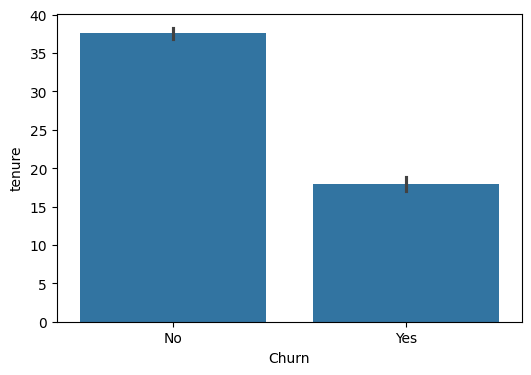

In [56]:
#Analyzing the relationship between tenure and churn
plt.figure(figsize=(6,4))
sns.barplot(
    data = df,
    x = 'Churn',
    y = 'tenure'
)
plt.show()

The above plot doesnt do much in terms of analysis, I will bin the tenure into categories for a better analysis

In [57]:
bins = [0,12,24,np.inf]
labels = ['0 - 12 months', '12 - 24 months', '24+ months']

df['tenure_group'] = pd.cut(df['tenure'], bins = bins, labels = labels, right = True)
df['tenure_group']

0        0 - 12 months
1           24+ months
2        0 - 12 months
3           24+ months
4        0 - 12 months
             ...      
7038    12 - 24 months
7039        24+ months
7040     0 - 12 months
7041     0 - 12 months
7042        24+ months
Name: tenure_group, Length: 7043, dtype: category
Categories (3, object): ['0 - 12 months' < '12 - 24 months' < '24+ months']

In [58]:
pd.crosstab(df['tenure_group'], df['Churn'], normalize= 'index')

Churn,No,Yes
tenure_group,,
0 - 12 months,0.523218,0.476782
12 - 24 months,0.712891,0.287109
24+ months,0.859640,0.140360


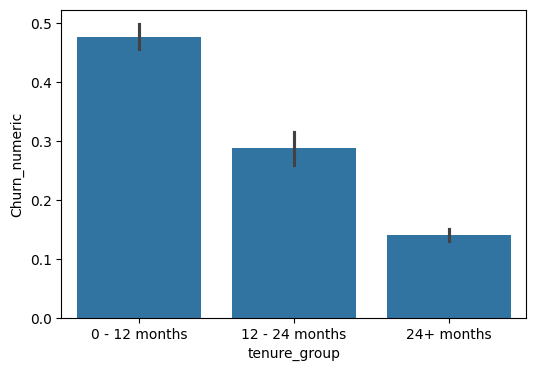

In [59]:
plt.figure(figsize = (6,4))
sns.barplot(
    data = df,
    x = 'tenure_group',
    y = 'Churn_numeric'
)
plt.show()

Summary: 

From the above plot, we can see that the users with the most churn are those with less time being subscribed, i.e those who subscribed for only a year are almost 50% likely to churn, why may that be? What are we doing wrong that makes early subscribers more likely to churn? What type of early subscribers are more likely to churn? 

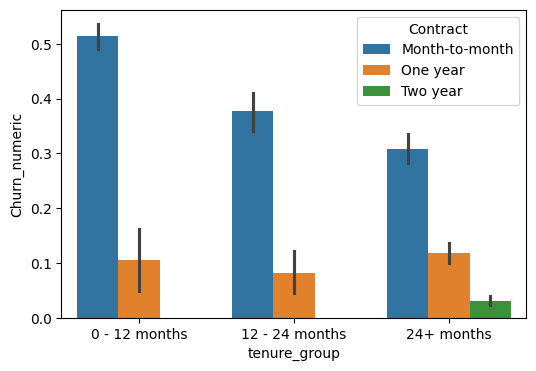

In [60]:
plt.figure(figsize=(6,4))
sns.barplot(
    data = df,
    x = 'tenure_group',
    y = 'Churn_numeric',
    hue = 'Contract'
)
plt.show()

Summary: 

Now, this brings us to two questions, why are people on the month2month contract not switching to longer term contracts after a certain period, ,as we have 1 year and 2 year users still on Month2month contracts 

Monthly Charges vs Churn

In [61]:
df['MonthlyCharges'].max()

np.float64(118.75)

In [62]:
bins = [0,45,75,np.inf]
labels = ['Low Spend', 'Mid Spend', 'High Spend']
df['MonthlyCharges_group'] = pd.cut(df['MonthlyCharges'], bins = bins, labels = labels, right = True)
df['MonthlyCharges_group']

0        Low Spend
1        Mid Spend
2        Mid Spend
3        Low Spend
4        Mid Spend
           ...    
7038    High Spend
7039    High Spend
7040     Low Spend
7041     Mid Spend
7042    High Spend
Name: MonthlyCharges_group, Length: 7043, dtype: category
Categories (3, object): ['Low Spend' < 'Mid Spend' < 'High Spend']

<Axes: xlabel='MonthlyCharges_group', ylabel='Churn_numeric'>

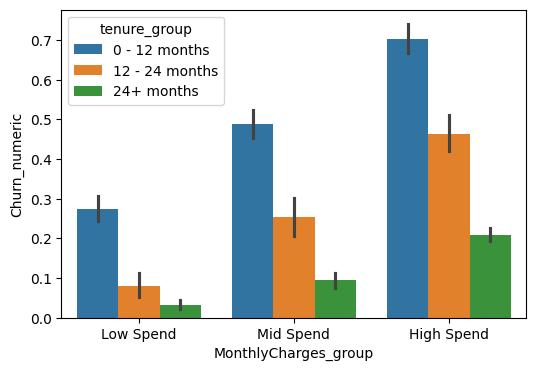

In [63]:
plt.figure(figsize=(6,4))
sns.barplot(
    data = df,
    x = 'MonthlyCharges_group',
    y = 'Churn_numeric',
    hue = 'tenure_group'
)


Summary: 

A whopping 70% of people who spend high within a year leave, why is that? 

Cause spending is high commitment, what is then turning them away? 

### Bivariate Analysis Summary

1. Users on Month to Month contracts have about 4x the amount of churn with 2x the amount of users, this gives an imbalance with a factor of 2 i.e every churning 1Y contract user = 2 Churning M2M users 

2. Fiber Optic internet service has about 40% of its users churning, We need to revise the core offering. There may be something wrong with the whole offering either the price/product is skewed or slow internet speeds 

3. Users who dont subscribe to Online backup, Device protection, Online Security and Tech support have about a 40% chance of churning and the more of these services a user subscribes to, the less they churn. We can bundle theser services as part of a payment plan

4. Users who use the E-Check method of payment have a 40% chance of churning 

5. Users who were only available for less than 1 year have the most churn and there is a disproportionate amount of m2m users at higher timeframes i.e a year upward. A rethink of retention service with possible added incentives for upgrading contracts should be done 

6. The highest churning people are those who spend above 75 dollars in a year. With this amount of spend signalling high commitment, we can consider loyalty programs or asking for why they are leaving exactly

### Multivariate Analysis

1. what type of customers use e checks, how does that relate to their high churn 
2. What type of users have a higher stickiness 
3. if 70% of high spenders leave in a year, why is that? 
4. Why are people on m2m contracts for years without converting to the yearly or multiple year contracts? 
5. Is there an inherent problem with fiber optics itself or is it the demographics using them

In [64]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group'],
      dtype='object')

#### E-Check Analysis 

Given that the users who use E-checks are more likely to churn, I want to check 

1. What demographic they are
2. If there are any confounding variables (i.e are they more likely to subscribe to another high churn category?)
3. How "sticky" are they? 

In [65]:
e_check_users = df[df['PaymentMethod'] == 'E-Check'].reset_index()

In [66]:
#demographic test among ONLY e-check users
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure_group']
for column in columns: 
    print(pd.crosstab(e_check_users['Churn'], e_check_users[f'{column}'], normalize = 'index'))

gender    Female      Male
Churn                     
No      0.500773  0.499227
Yes     0.487395  0.512605
SeniorCitizen         0         1
Churn                            
No             0.785935  0.214065
Yes            0.704015  0.295985
Partner        No       Yes
Churn                      
No       0.517774  0.482226
Yes      0.646125  0.353875
Dependents        No       Yes
Churn                         
No          0.748841  0.251159
Yes         0.856209  0.143791
tenure_group  0 - 12 months  12 - 24 months  24+ months
Churn                                                  
No                 0.287481        0.151468    0.561051
Yes                0.565826        0.171802    0.262372


###### Summary on demographic analysis: 

* Seniors are slightly over-represented in the churn column with a 8% differential between both churn and not churn columns 

* The highest risk users are those with no dependents, as they have a 85% churn rate!

* In keeping with above analysis, the tenure group with the most churn is still the 0-12 months group

I think now we can dive deeper, what more do these high risk users have that makes them segmentable? 

To determine whether E-Check is a causal churn driver or a proxy for risk, I will compare the proportion of E-Check users in known high-risk categories (Fiber Optic, Month-to-Month contracts, and low stickiness) against other payment methods.

In [67]:
#Segmenting all high risk categories which are fiber optic, M2M users and low stickiness scores
df['HighRisk_Fiber'] = df['InternetService'] == 'Fiber optic'
df['HighRisk_Contract'] = df['Contract'] == 'Month-to-month'
df['HighRisk_LowStickiness'] = df['StickinessScore'] < 2

# Low stickiness is defined as subscribing to 0–1 value-added services. 
# This threshold was selected due to a clear inflection point in churn behavior.

In [68]:
pd.crosstab(
    df['PaymentMethod'],
    df['HighRisk_Fiber'],
    normalize = 'index'
)

HighRisk_Fiber,False,True
PaymentMethod,,
BT,0.581606,0.418394
CC,0.607753,0.392247
E-Check,0.325581,0.674419
M-Chec,0.839950,0.160050


67% of all E check users are subscribed to Fiber, this is the first sign of the payment method itself not being the case but the people who use the payment method being inherently high risk

In [69]:
pd.crosstab(
    df['PaymentMethod'],
    df['HighRisk_Contract'],
    normalize = 'index'
)

HighRisk_Contract,False,True
PaymentMethod,,
BT,0.618523,0.381477
CC,0.643233,0.356767
E-Check,0.217759,0.782241
M-Chec,0.446030,0.553970


Yet another sign, with 78% percent of all E_check users also being on month2month contracts

In [70]:
pd.crosstab(
    df['PaymentMethod'],
    df['HighRisk_LowStickiness'],
    normalize = 'index'
)

HighRisk_LowStickiness,False,True
PaymentMethod,,
BT,0.510363,0.489637
CC,0.519054,0.480946
E-Check,0.335729,0.664271
M-Chec,0.254963,0.745037


Here however, M-Check users have a higher proportion of members with low stickiness but E-Check is close behind 
Both Bank Transfer and Credit card have above 50% sticky users

##### Summary on E-Check Multivariate Analysis: 

Customers using the E-Check payment method exhibit significantly higher churn rates compared to other payment methods. However, multivariate analysis shows that this is not driven by the payment method itself, but by the risk profile of customers who disproportionately use E-Checks

E-Check users rank highest or second highest across all three major churn risk dimensions:

* 67.4% of E-Check users are subscribed to Fiber Optic internet, the highest-churn service offering (≈20% higher than the next closest payment method)

* 78% are on Month-to-Month contracts, which are strongly associated with churn (again ≈20% higher than alternatives)

* ~68% exhibit low stickiness (≤1 protective service), indicating weak ecosystem attachment

What This means: 
* E-Check acts as a proxy indicator for a high-risk customer segment rather than a causal churn driver. Changing the payment system itself would not materially reduce churn.

Suggestions: 

Retention efforts should prioritize customers who simultaneously exhibit:
* Month-to-Month contracts
* Fiber Optic subscriptions
* Low service stickiness

Targeted interventions such as bundled protective services for M2M Fiber users or incentives to migrate high-risk E-Check users to longer-term contracts are likely to deliver higher ROI than payment-method changes.

#### Stickiness Analysis 

##### Stickiness - Demographic Analysis

Given that the users with higher stickiness are more likely to stay, the bulk of this analysis is finding who exactly are these users

In [71]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges_Log,Churn_numeric,Total_additional_Options,Total_additional_Options_2,StickinessScore,tenure_group,MonthlyCharges_group,HighRisk_Fiber,HighRisk_Contract,HighRisk_LowStickiness
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,3.429137,0.0,2,1,1,0 - 12 months,Low Spend,False,True,True
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,7.544597,0.0,3,2,2,24+ months,Mid Spend,False,False,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,4.692723,1.0,3,2,2,0 - 12 months,Mid Spend,False,True,False
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,7.518471,0.0,4,3,3,24+ months,Low Spend,False,False,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,5.028148,1.0,1,0,0,0 - 12 months,Mid Spend,True,True,True


In [72]:
pd.crosstab(
    df['SeniorCitizen'],
    df['Churn_numeric'],
    normalize='index'
)

Churn_numeric,0.0,1.0
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


In [73]:
df.groupby('SeniorCitizen')['StickinessScore'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\423462527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('SeniorCitizen')['StickinessScore'].mean()


SeniorCitizen
0    1.259109
1    1.299475
Name: StickinessScore, dtype: float64

###### Senior Citizen vs Stickiness 

* Senior citizens have a mean stickiness score of about 1.3 while non senior citizens have a mean stickiness score of 1.26 

* This suggests negligible effect between being a senior and purchasing sticky services 

* Hence, there is no need for special sticky incentives aimed at seniors specifically and we can put them on the global improvements

In [74]:
df.groupby('Partner')['StickinessScore'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3763009959.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Partner')['StickinessScore'].mean()


Partner
No     1.014831
Yes    1.534098
Name: StickinessScore, dtype: float64

###### Partner vs Stickiness:

* Users with a partner have a mean StickinessScore of 1.53, while those without a partner score 1.01.

* That’s roughly a 50% higher engagement with protective/extra services, suggesting that having a partner is strongly associated with subscribing to more services.

* Actionable angle: Marketing or retention campaigns could highlight family-oriented bundles or offers, since partnered users are already more inclined to adopt multiple services.

In [75]:
df.groupby('tenure_group')['StickinessScore'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\190802430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')['StickinessScore'].mean()


tenure_group
0 - 12 months     0.555402
12 - 24 months    0.939453
24+ months        1.755283
Name: StickinessScore, dtype: float64

###### Tenure vs Stickiness 

* Stickiness scores jump significantly after the 24-month mark ($1.76$), while the growth between 0-12 and 12-24 months is relatively sluggish ($0.55 \rightarrow 0.94$).

* This indicates a "Retention Wall." If we don't get users deeply embedded in the ecosystem during their second year, they aren't likely to reach that high-stability "double stickiness" phase. The friction to leave is too low during the 12-24 month window.

* We should:
    * Launch a "Year 2 Anniversary" campaign specifically designed to add 1-2 sticky services (like Online Security or Tech Support) at a discount.
    * Instead of waiting for them to stay 24 months to become sticky, we need to pull that stickiness forward into the 12-18 month window.

In [76]:
df.groupby('Dependents')['StickinessScore'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\2365096363.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Dependents')['StickinessScore'].mean()


Dependents
No     1.211230
Yes    1.392891
Name: StickinessScore, dtype: float64

###### Dependents Vs Stickiness Score: 

* People with dependents have a slight increase in stickiness score with a 1.4, compared to a 1.2 for the others 

* This doesnt suggest anything much on its own, but it corroborates the point on marketing campaigns focused on partners and families

###### Summary - Stickiness Demographic Analysis 

* Senior Citizens: Stickiness scores are nearly identical to non-seniors. No special incentives are needed for this segment.

* Partnered Users: Stickiness scores are ~50% higher than non-partnered users. Recommend targeted marketing and retention campaigns around family-oriented bundles, especially for users entering key life transitions (e.g., marriage).

* Users with Dependents: Slightly higher stickiness than those without, consistent with the trend among partnered users. Covered under the partnered-user strategy.

##### Stickiness - Extra services Analysis 

in this segment, I will analyse whether specific services lead to higher stickiness 

In [77]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness'],
      dtype='object')

###### Multiple Lines stickiness analysis 

In [78]:
df.groupby('MultipleLines')['StickinessScore'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\669753693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MultipleLines')['StickinessScore'].mean()


MultipleLines
No                  0.887906
No phone service    1.706745
Yes                 1.595422
Name: StickinessScore, dtype: float64

* The users with multiple lines have a mean sticky score of 1.6, while the users with no phone service has a mean stickiness score of 1.71 and No phone usage has a minimal sticky score of 0.9 

* This suggests that alot of the sticky services appeal to 2 major users, those who are internet only and those who have multiple lines 

* there could be a strong correlation between users with multiple lines and those with internet services, I should check for a confounding variable as internet services might be the major source of stickiness 

* No action to be taken yet until further analysis 

In [79]:
pd.crosstab(
    df['InternetService'],
    df['MultipleLines'] == 'Yes',
    normalize = 'index'
)

MultipleLines,False,True
InternetService,,
DSL,0.714581,0.285419
Fiber optic,0.374031,0.625969
No,0.775885,0.224115


In [80]:
df.groupby('InternetService')['StickinessScore'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\286399273.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('InternetService')['StickinessScore'].mean()


InternetService
DSL            1.862454
Fiber optic    1.422804
No             0.000000
Name: StickinessScore, dtype: float64

Summary(Multiple Lines Stickiness Analysis):

* ~63% of Fiber Optic users have multiple lines, compared to 28% of DSL users.

* Once Fiber Optic is accounted for, multiple lines appear to have little effect on stickiness. Fiber also has the highest churn among internet services (42% vs 19% for DSL).

* Therefore, Multiple Lines does not add predictive value for identifying high-value customers; the apparent stickiness of Fiber (1.42 vs 1.9 for DSL) is likely driven by bundled offerings rather than genuine retention.

###### Internet Service Stickiness Analysis

In [81]:
#Questions to be answered, What internet service leads to the highest amount of stickiness
df.groupby('InternetService')['StickinessScore'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3282718271.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('InternetService')['StickinessScore'].mean()


InternetService
DSL            1.862454
Fiber optic    1.422804
No             0.000000
Name: StickinessScore, dtype: float64

In [82]:
df.groupby('InternetService')['MonthlyCharges'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\785521313.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('InternetService')['MonthlyCharges'].mean()


InternetService
DSL            58.102169
Fiber optic    91.500129
No             21.079194
Name: MonthlyCharges, dtype: float64

Summary: 

* DSL shows a stickiness of 1.86 with churn 0.2, compared to Fiber Optic at 1.42 with churn 0.4, indicating stronger retention and higher loyalty.

* Fiber Optic users, despite nearly double the ARPU of DSL, show lower loyalty and higher churn.

* High loyalty among DSL users suggests focusing acquisition and retention efforts on this segment, while Fiber retention strategies should be re-evaluated.

In [83]:
added_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

moat_audit = df.groupby('InternetService')[added_services].apply(lambda x: (x == 'Yes').mean())
print(moat_audit)


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\401515388.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moat_audit = df.groupby('InternetService')[added_services].apply(lambda x: (x == 'Yes').mean())


                 OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
InternetService                                                                
DSL                    0.487402      0.448575          0.439901     0.486576   
Fiber optic            0.270995      0.433786          0.438307     0.279716   
No                     0.000000      0.000000          0.000000     0.000000   

                 StreamingTV  StreamingMovies  
InternetService                                
DSL                 0.395291         0.405204  
Fiber optic         0.565245         0.565568  
No                  0.000000         0.000000  


Summary: 

* There is a significant "Protection Gap" in our Fiber Optic tier: ~56% of Fiber users have Streaming, but only ~27% have Online Security or Tech Support. In contrast, DSL users have nearly 50% adoption in these protective categories.

* Data shows that Online Security and Tech Support are true "Retention Anchors": customers with these services churn at less than half the rate of those with only Streaming. Currently, our highest-paying Fiber users are loaded with low-friction entertainment instead of high-friction utility.

* Every Fiber Month-to-Month customer, our highest risk segment, should be offered a 6-month discounted “Security & Support” bundle. This shifts them from an entertainment-only profile to a protected profile before their next billing cycle.

Internet Service Stickiness Analysis Summary: 

* DSL shows higher stickiness (1.8 : 1.4) and we should intensify marketing efforts for them 

* Fiber Optic users are signed up to entertainment services without protective services, We should bundle them before their next billing cycles 

##### Stickiness - Confounding Variables

in this section, I will find how stickiness relates to contracts and monthly charges

In [84]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness'],
      dtype='object')

In [85]:
df.groupby('Contract')['StickinessScore'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3587535033.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Contract')['StickinessScore'].mean()


Contract
Month-to-month    0.880258
One year          1.610319
Two year          1.847198
Name: StickinessScore, dtype: float64

In [86]:
df.groupby('Contract')['MonthlyCharges'].mean()

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3446289405.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Contract')['MonthlyCharges'].mean()


Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

m2M has about 50% the stickiness score of one year and two year contracts 

This suggests that month 2 month users are not properly embedded into the ecosystem. Short contracts + low friction brings the huge increase in churn we see. However this may not be just due to commitment as Month 2 month users have the highest mean monthly charges at 66 dollars with one year next at 65 anad 2 year follows at 60 

In [87]:
first_year_df = df[df['tenure'] <= 12] . copy()

<Axes: xlabel='tenure', ylabel='Churn_numeric'>

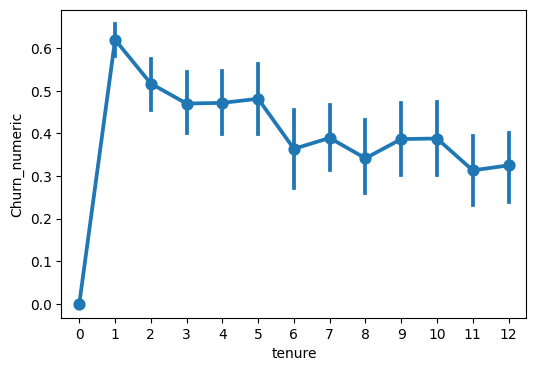

In [88]:
plt.figure(figsize= (6,4))
sns.pointplot(
    data = first_year_df,
    x = 'tenure',
    y = 'Churn_numeric'
)

churn in the first month is the highest at about 60% before stabilizing around 50% in the upcoming months. 
from month 6, most people are less likely to churn than to churn (less than 50% prob)

###### Stickiness - Confounding Variables Summary

* Month-to-Month customers have the highest ARPU ($66) but approximately 50% of the stickiness of longer-term contract users.

* Churn is heavily front-loaded:

    ~60% of Month-to-Month users churn in the first month.

    The remaining cohort declines by ~50% each month through month five.

    Fewer than 5% of Month-to-Month users remain after five months.

* Interpretation

    Month-to-Month customers represent a high-revenue but structurally unstable segment.

    The churn pattern suggests a systematic early-lifecycle failure (onboarding, expectation setting, or service delivery), not price sensitivity.

* What Now

    Audit sales and onboarding processes for potential over-promising to Month-to-Month customers.

    Introduce mandatory early stickiness for Month-to-Month internet sign-ups (e.g., bundled Online Security or Tech Support during the first 60 days).
    
    Shift retention focus to months 0–2, where the majority of revenue leakage occurs.

#### High Spender Churn Analysis 

in this section, I will uncover why 70% of high spenders leave within a year and if it is causal or just correlative with another confounding variable

In [89]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness'],
      dtype='object')

In [90]:
first_year_df.groupby('MonthlyCharges_group')['Churn_numeric'].value_counts(normalize = True)

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\465410568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  first_year_df.groupby('MonthlyCharges_group')['Churn_numeric'].value_counts(normalize = True)


MonthlyCharges_group  Churn_numeric
Low Spend             0.0              0.727742
                      1.0              0.272258
Mid Spend             0.0              0.515192
                      1.0              0.484808
High Spend            1.0              0.701835
                      0.0              0.298165
Name: proportion, dtype: float64

In [91]:
high_spenders = df[df['MonthlyCharges_group'] == 'High Spend']

<Axes: xlabel='tenure', ylabel='Churn_numeric'>

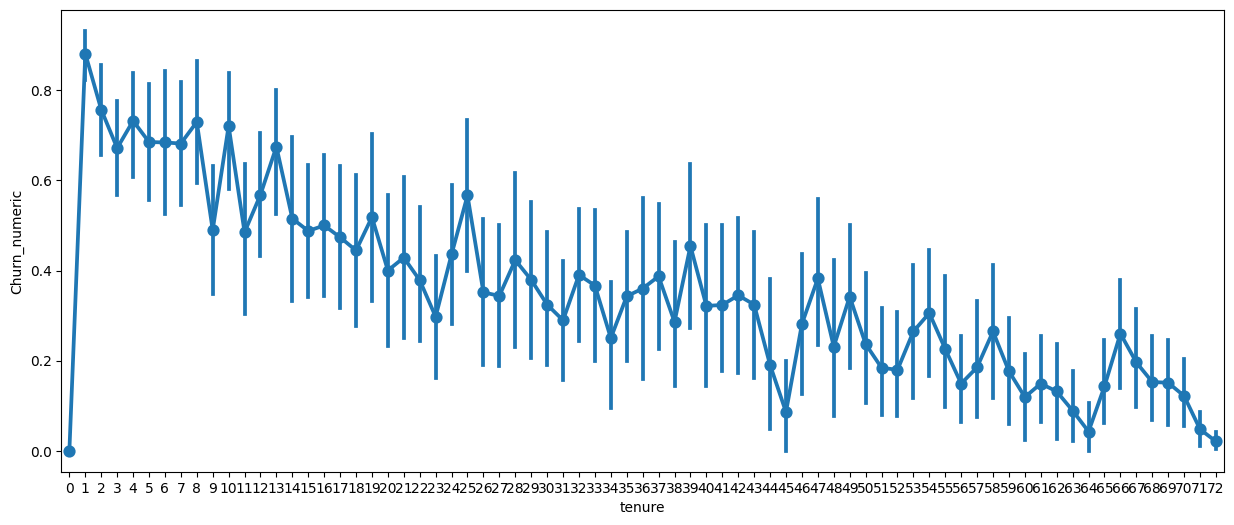

In [92]:
plt.figure(figsize=(15,6))
sns.pointplot(
    data = high_spenders,
    x = 'tenure',
    y = 'Churn_numeric'
)

In [93]:
pd.crosstab(
    high_spenders['HighRisk_Fiber'],
    high_spenders['Churn_numeric'],
    normalize = 'index'
)

Churn_numeric,0.0,1.0
HighRisk_Fiber,,
False,0.955814,0.044186
True,0.605204,0.394796


In [94]:
pd.crosstab(
    high_spenders['StickinessScore'],
    high_spenders['Churn_numeric'],
    normalize = 'index'
)

Churn_numeric,0.0,1.0
StickinessScore,,
0,0.346080,0.653920
1,0.537805,0.462195
2,0.698432,0.301568
3,0.847079,0.152921
4,0.942623,0.057377


people with 0 stickiness score churn 65% of the time, however those with at least one stickiness score churn at most 46% of the time. 

Next is to check what proportion of users are in stickiness 0 

In [95]:
df['StickinessScore'].value_counts(normalize=True)*100

StickinessScore
0    39.656396
1    20.829192
2    19.480335
3    13.360784
4     6.673293
Name: proportion, dtype: float64

40% of high priced users are on 0 sticky score, but are these the year 1 users who we are most interested in? 

For the first 12 months, high spenders churn at an average of 70% each month, 60% of those who churn also arent even on the fiber network 

this is a huge bleeding of funds, which suggest high investment but with low expectations met 



In [96]:
df_y1_spenders = df[(df['MonthlyCharges_group'] == 'High Spend') & (df['tenure'] <= 12)]

In [97]:
df_y1_spenders['StickinessScore'].value_counts(normalize = True) * 100

StickinessScore
0    43.577982
1    38.073394
2    13.914373
3     3.975535
4     0.458716
Name: proportion, dtype: float64

year 1 high spenders have ~44% of people with 0 stickiness (5% above the global average), and then 38% of people with 1 stickiness(18% above the global average), from there on in, there is not much in terms of stickiness 

why exactly do 38% of people have 1 stickiness, why the disparity from the average + there should not be this much churn (70%), if they are subscribed to sticky services. 

Next, I will check what sticky service exactly is being used and by what %

In [98]:
df_y1_spenders.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness'],
      dtype='object')

In [99]:
df_y1_spenders.groupby('TechSupport')['Churn'].value_counts(normalize = True)


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\2273736782.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_y1_spenders.groupby('TechSupport')['Churn'].value_counts(normalize = True)


TechSupport          Churn
No                   Yes      0.724199
                     No       0.275801
No internet service  No       0.000000
                     Yes      0.000000
Yes                  Yes      0.565217
                     No       0.434783
Name: proportion, dtype: float64

In [100]:
df_y1_spenders.groupby('DeviceProtection')['Churn'].value_counts(normalize = True)


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\934835027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_y1_spenders.groupby('DeviceProtection')['Churn'].value_counts(normalize = True)


DeviceProtection     Churn
No                   Yes      0.710300
                     No       0.289700
No internet service  No       0.000000
                     Yes      0.000000
Yes                  Yes      0.680851
                     No       0.319149
Name: proportion, dtype: float64

In [101]:
df_y1_spenders.groupby('OnlineBackup')['Churn'].value_counts(normalize = True)


C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3945788837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_y1_spenders.groupby('OnlineBackup')['Churn'].value_counts(normalize = True)


OnlineBackup         Churn
No                   Yes      0.712851
                     No       0.287149
No internet service  No       0.000000
                     Yes      0.000000
Yes                  Yes      0.666667
                     No       0.333333
Name: proportion, dtype: float64

In [102]:
df_y1_spenders.groupby('OnlineSecurity')['Churn'].value_counts(normalize = True)

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\3096721961.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_y1_spenders.groupby('OnlineSecurity')['Churn'].value_counts(normalize = True)


OnlineSecurity       Churn
No                   Yes      0.738137
                     No       0.261863
No internet service  No       0.000000
                     Yes      0.000000
Yes                  No       0.541176
                     Yes      0.458824
Name: proportion, dtype: float64

##### High-Spender Stickiness vs. Churn

High-spending new customers are in a 'High-Risk' zone with a 70% churn rate. Most services (Backup, Protection) are ineffective at stopping this. However, Online Security and Tech Support are the only services that provide a statistically significant 'Retention Shield,' reducing churn risk by up to 24%

In [103]:
df_y1_spenders['TechSupport'].value_counts(normalize = True) * 100

TechSupport
No                     85.932722
Yes                    14.067278
No internet service     0.000000
Name: proportion, dtype: float64

In [104]:
df_y1_spenders['DeviceProtection'].value_counts(normalize = True) * 100

DeviceProtection
No                     71.253823
Yes                    28.746177
No internet service     0.000000
Name: proportion, dtype: float64

In [105]:
df_y1_spenders['OnlineBackup'].value_counts(normalize = True) * 100

OnlineBackup
No                     76.146789
Yes                    23.853211
No internet service     0.000000
Name: proportion, dtype: float64

In [106]:
df_y1_spenders['OnlineSecurity'].value_counts(normalize = True) * 100

OnlineSecurity
No                     87.003058
Yes                    12.996942
No internet service     0.000000
Name: proportion, dtype: float64

Proportion Analysis: 

High-Spending customers have higher adoption of the OnlineBackup (~24%) and DeviceProtection (~29%) services with only around (~13%) of users being subscribed to Online Security and (~14%) being subscribed to Tech support 

This reflects a ~10–15 percentage-point adoption gap between services previously shown to be associated with lower churn (OnlineSecurity, TechSupport) and services with weaker retention impact. Given that this cohort consists of Year-1 high spenders, willingness to pay is unlikely to be the primary constraint; the gap is more plausibly driven by communication and perception rather than price. 

Recommended Actions: 
* Audit Onboarding flows to identify whether users are being nudged to lower impact services
* Analyze expectation vs actual usage for Online Security and Tech Support to identify value gaps 
* Reframe marketing and in-product messaging to make Tech Support and Online Security more accessible and easier to understand to users

##### **High Spender Churn Analysis - Summary**: 

* **Low Engagement among year 1 high spenders**: 

44% have a stickiness score of 0 and 38% have a stickiness score of 1, signalling minimal adoption of protective services
* **Service Effectiveness**: 

Churn rates remain high for Online Backup (~68%) and Device Protection (~67%) while Tech Support (~57%) and Online Security (~54%) show higher retention 
* **Service Adoption** : 

Among year 1 spenders, 24% subscribe to online backup, 29% to device protection but only 13% to Online Security and 14% to Tech support, showcasing underutilization of the services with better retention

#### ***M2M* Contract Retention Analysis**

Why are high spenders on m2m contracts for years without converting to the yearly or multiple year contracts?

In [107]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness'],
      dtype='object')

In [108]:
df_month_to_month = df[df['Contract'] == 'Month-to-month']

In [109]:
df_month_to_month = df_month_to_month.reset_index()

In [110]:
df_month_to_month['tenure_group'].value_counts(normalize = True) * 100

tenure_group
0 - 12 months     51.458065
24+ months        29.522581
12 - 24 months    19.019355
Name: proportion, dtype: float64

Month to Month Retention Insight: 

30% of customers on Month to Month contracts have tenures of 24 months or higher 

Indicating that a large subset of users remain on flexible contracts and that time alone is not a guarantee for an upgrade

Theses: 
* Contract upgrade friction may be higher for the 2 year contracts as opposed to the one year contract
* There may be distinct long tenured users which exhibit this preference for flexibility 

In [111]:
df_m2m_lt = df_month_to_month[df_month_to_month['tenure']>= 24].reset_index()

Looking for what type of users use the month to month contracts long term

In [112]:
df_m2m_lt.columns

Index(['level_0', 'index', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_Log', 'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness'],
      dtype='object')

In [113]:
df_m2m_lt = df_m2m_lt.drop(columns = ['level_0', 'index', 'gender', 'TotalCharges_Log'])

In [114]:
df_month_to_month['Partner'].value_counts(normalize = True)

Partner
No     0.643871
Yes    0.356129
Name: proportion, dtype: float64

In [115]:
df_m2m_lt['Partner'].value_counts(normalize = True)

Partner
Yes    0.53827
No     0.46173
Name: proportion, dtype: float64

the users who are longer term and month 2 month are 18% more likely to have a partner

In [116]:
df_month_to_month['StickinessScore'].value_counts(normalize = True)

StickinessScore
0    0.445677
1    0.304516
2    0.182452
3    0.058581
4    0.008774
Name: proportion, dtype: float64

In [117]:
df_m2m_lt['StickinessScore'].value_counts(normalize = True)

StickinessScore
1    0.340266
2    0.310316
0    0.210483
3    0.118136
4    0.020799
Name: proportion, dtype: float64

the month to month long term members have a sticky score of 0 only 21% of the time, with 65% of long term month to month users having between 1 or 2 sticky services 

This shows them being embedded into the ecosystem, hence we can scratch off loyalty as the reason for them not upgrading to 2 year contracts

In [118]:
df_month_to_month['MonthlyCharges'].mean()

np.float64(66.39849032258066)

In [119]:
df_m2m_lt['MonthlyCharges'].mean()

np.float64(78.57017470881864)

long term month to month users have an average ARPU $12 higher than the month to month control group at ($78) compared to ($66)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

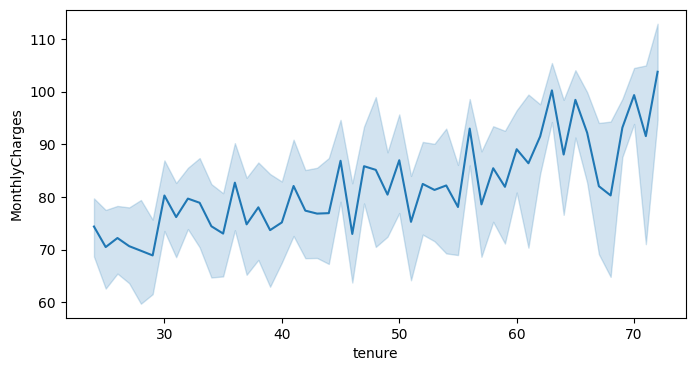

In [120]:
plt.figure(figsize = (8,4))
sns.lineplot(
    data = df_m2m_lt,
    x = 'tenure',
    y = 'MonthlyCharges'
)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

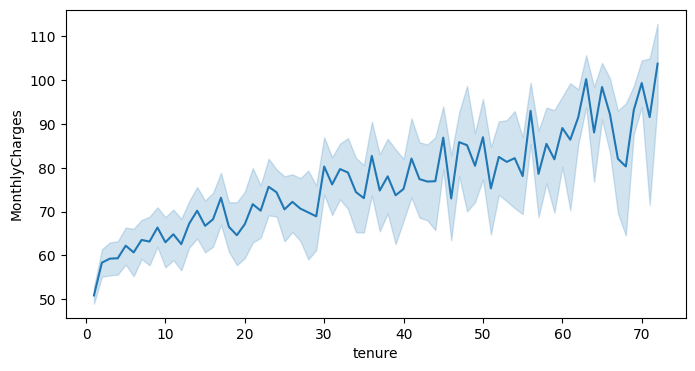

In [121]:
plt.figure(figsize = (8,4))
sns.lineplot(
    data = df_month_to_month,
    x = 'tenure',
    y = 'MonthlyCharges'
)

Long-Term Month-to-Month User Profile (≥24 months):

* Higher-than-average ARPU and rising charges over time
* Moderate-to-high service stickiness (1–2 services dominant)
* Over-index on partnered households
* Persist on flexible contracts despite engagement and spend

charges for the month to month long term users also trend upward, same as the month to month control group, this shows that they arent low cost users who are just coasting 

Next, I would check what type of services these users use most of the time

In [122]:
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
m2m_lt_services = df_m2m_lt[services].apply(lambda x: (x == 'Yes')).mean()* 100

m2m_lt_services.sort_values(ascending = False)

StreamingMovies     49.251248
StreamingTV         48.502496
OnlineBackup        46.838602
DeviceProtection    40.099834
OnlineSecurity      28.119800
TechSupport         24.792013
dtype: float64

Our high M2M spenders are mostly subscribed to Streaming movies (49%) and Streaming TV (~49%) 
The spread between Streaming TV and Device protection is only 9%

However, there is a steep drop off to Online security (28%) and Tech Support (~25%). With the earlier analysis proving that these two are the best retaining services, the fact that our highest spenders are not on it represents an additional risk factor

what next? 

* Check the bundling: what % of time do users have both entertainment and preventative services 
* Check what % of people in this group use fiber 

In [123]:
security_services = ['OnlineSecurity','TechSupport', ]
entertainment = ['StreamingTV', 'StreamingMovies']

df_m2m_lt['anchor_user'] = (df_m2m_lt['OnlineSecurity'] == 'Yes') & (df_m2m_lt['TechSupport'] == 'Yes')
df_m2m_lt['entertainment_user'] = (df_m2m_lt['StreamingTV'] == 'Yes') & (df_m2m_lt['StreamingMovies'] == 'Yes')

In [124]:
pd.crosstab(
    df_m2m_lt['anchor_user'],
    df_m2m_lt['entertainment_user'],
    normalize='index'
)

entertainment_user,False,True
anchor_user,,
False,0.648723,0.351277
True,0.716981,0.283019


only 28% of long term month to month users are overlapping between both entertainment and security with 72% of people who use the security bundles decoupled from entertainment and 65% of people using neither

there is just a 7% difference between people who subscribe to entertainment and have the protective services vs those who subscribe to entertainment and have no protective services. 

This suggests that there isnt a "junk" services issue and that we have to look deeper. 

If 65% of people are on neither entertainment or anchor services, what do they subscribe to? 

In [125]:
df_m2m_lt['InternetService'].value_counts(normalize = True) * 100

InternetService
Fiber optic    68.302829
DSL            26.955075
No              4.742097
Name: proportion, dtype: float64

In [126]:
df['InternetService'].value_counts(normalize = True)*100

InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

our highest spenders, on our most popular internet service, with relatively good sticky service engagement, on our most risky contracts. However from above, the sticky services they mostly use are not the better retention ones 

Now we ask, is it the services that keep or is it just that the subset of users using said services are more likely to stay for example, since we already know DSL churns less than fiber optic, what if more DSL users just happen to use tech support. What if if Fiber users jump into tech support, we see an increase in churn What if the real smoking gun is not the sticky services but the fiber optic cocktail

In [127]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness'],
      dtype='object')

In [128]:
df.groupby('InternetService')['TechSupport'].value_counts(normalize = True)*100

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\2336091992.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('InternetService')['TechSupport'].value_counts(normalize = True)*100


InternetService  TechSupport        
DSL              No                      51.342420
                 Yes                     48.657580
                 No internet service      0.000000
Fiber optic      No                      72.028424
                 Yes                     27.971576
                 No internet service      0.000000
No               No internet service    100.000000
                 No                       0.000000
                 Yes                      0.000000
Name: proportion, dtype: float64

49% of DSL users are also subscribed to tech support, now I will control for fiber users only to understand the distribution

In [129]:
df_fiber_only = df_m2m_lt[df_m2m_lt['InternetService'] == 'Fiber optic']

In [130]:
security_services = ['OnlineSecurity','TechSupport', ]
entertainment = ['StreamingTV', 'StreamingMovies']

df_fiber_only['anchor_user'] = (df_fiber_only['OnlineSecurity'] == 'Yes') & (df_fiber_only['TechSupport'] == 'Yes')
df_fiber_only['entertainment_user'] = (df_fiber_only['StreamingTV'] == 'Yes') & (df_fiber_only['StreamingMovies'] == 'Yes')

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\2874456200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fiber_only['anchor_user'] = (df_fiber_only['OnlineSecurity'] == 'Yes') & (df_fiber_only['TechSupport'] == 'Yes')
C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_9532\2874456200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fiber_only['entertainment_user'] = (df_fiber_only['StreamingTV'] == 'Yes') & (df_fiber_only['StreamingMovies'] == 'Yes')


In [131]:
df_fiber_only.groupby('anchor_user')['Churn'].value_counts(normalize = True)*100

anchor_user  Churn
False        No       59.350649
             Yes      40.649351
True         No       84.313725
             Yes      15.686275
Name: proportion, dtype: float64

In [132]:
vulnerable_vets = df_m2m_lt[(df_m2m_lt['anchor_user'] == False) & (df_m2m_lt['InternetService'] == 'Fiber optic')]
total_at_risk_revenue = vulnerable_vets['MonthlyCharges'].sum()

print(f"Total Vulnerable Veterans: {len(vulnerable_vets)}")
print(f"Monthly Revenue at 41% Churn Risk: ${total_at_risk_revenue:,.2f}")

Total Vulnerable Veterans: 770
Monthly Revenue at 41% Churn Risk: $70,676.65


In [133]:
df_m2m_lt['anchor_user'].value_counts(normalize = True) * 100

anchor_user
False    91.181364
True      8.818636
Name: proportion, dtype: float64

##### M2M Contract Retention Analysis Summary 

The long term month to month users currently dont convert to longer term contracts because there is no incentive to, they are bedded in with some sticky services and therefore already experience the benefits of commitment without accepting the cost of commitment.

However, when these users arent subscribed to Tech support or Online security, their churn risk balloons 2.5x (unanchored) and this accounts to 91% of our long term month to month customers who directly currently contribute to ($70,676.65) dollars monthly

Recommendations: 
* Dont force them to convert to higher tenure contracts and risk losing a massive % of this cohort due to a change in friction 
* Introduce anchor services as a tenure-based benefit for long-term M2M users while reserving enhanced or premium anchor tiers exclusively for longer-term contracts.
* Audit onboarding and early lifecycle messaging to understand whether customers are being shown any incremental value to longer-term contracts once anchor services are active.

### Predictive Modelling and Validation

Modelling to Identify high-risk customers early enough to intervene profitably.

#### Feature Engineering

In [134]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness'],
      dtype='object')

In [135]:
df['TechSupport'].head()

0     No
1     No
2     No
3    Yes
4     No
Name: TechSupport, dtype: category
Categories (3, object): ['No', 'No internet service', 'Yes']

In [136]:
df['is_anchored'] = (df['TechSupport'] ==  'Yes') & (df['OnlineSecurity'] == 'Yes')

In [137]:
df['high_ARPU_newbie'] = (df['MonthlyCharges_group'] == 'High Spend') & (df['tenure'] <= 12)

In [138]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Log',
       'Churn_numeric', 'Total_additional_Options',
       'Total_additional_Options_2', 'StickinessScore', 'tenure_group',
       'MonthlyCharges_group', 'HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness', 'is_anchored', 'high_ARPU_newbie'],
      dtype='object')

In [139]:
dropped = ['Churn', 'TotalCharges','Total_additional_Options', 'Total_additional_Options_2', 'tenure_group', 'MonthlyCharges_group','HighRisk_Fiber', 'HighRisk_Contract',
       'HighRisk_LowStickiness','high_ARPU_newbie', 'MonthlyCharges']

In [140]:
ml_dataset = df.drop(columns=dropped)

In [141]:
ml_dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges_Log', 'Churn_numeric', 'StickinessScore', 'is_anchored'],
      dtype='object')

#### Feature Encoding and Preprocessing

In [142]:
ml_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges_Log,Churn_numeric,StickinessScore,is_anchored
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,E-Check,3.429137,0.0,1,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,M-Chec,7.544597,0.0,2,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,M-Chec,4.692723,1.0,2,False
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,BT,7.518471,0.0,3,True
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,E-Check,5.028148,1.0,0,False


In [143]:
df['PaperlessBilling'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [144]:
binary_variables = ['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','is_anchored']

In [145]:
mapping = {
    'Yes' : 1,
    'yes' : 1,
    'True' : 1,
    1:1
}

for col in binary_variables:
    ml_dataset[col] = ml_dataset[col].map(mapping).fillna(0).astype(int)

In [146]:
ml_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges_Log,Churn_numeric,StickinessScore,is_anchored
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0,0,0,Month-to-month,1,E-Check,3.429137,0.0,1,0
1,Male,0,0,0,34,1,No,DSL,1,0,...,0,0,0,One year,0,M-Chec,7.544597,0.0,2,0
2,Male,0,0,0,2,1,No,DSL,1,1,...,0,0,0,Month-to-month,1,M-Chec,4.692723,1.0,2,0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1,0,0,One year,0,BT,7.518471,0.0,3,1
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0,0,0,Month-to-month,1,E-Check,5.028148,1.0,0,0


In [147]:
x = ml_dataset.drop(columns = ['Churn_numeric', 'StickinessScore'])
y = ml_dataset['Churn_numeric']

In [148]:
x = pd.get_dummies(x, drop_first = True)

In [149]:
x = x.astype(int)

In [150]:
x.head()

,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,SeniorCitizen_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_CC,PaymentMethod_E-Check,PaymentMethod_M-Chec
0,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,34,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,45,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Baseline Model (Logistic Regression)

In [151]:
x.columns


Index(['Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'TotalCharges_Log',
       'is_anchored', 'gender_Male', 'SeniorCitizen_1',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year', 'PaymentMethod_CC',
       'PaymentMethod_E-Check', 'PaymentMethod_M-Chec'],
      dtype='object')

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()

cont_cols = ['tenure','TotalCharges_Log']
x_train[cont_cols] = scaler.fit_transform(x_train[cont_cols])
x_test[cont_cols] = scaler.transform(x_test[cont_cols])

In [153]:
model = LogisticRegression(class_weight = 'balanced', random_state=42)
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [154]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80      1035
         1.0       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



First run of the Logistic regression model gave a recall of 80% for churners with a precision of 51%, the model scored 62% 

Attempting classification threshold tweak to improve performance

In [186]:
y_scores = model.predict_proba(x_test)[:,1]
custom_threshold = 0.57

y_pred_custom_threshold = np.where(y_scores >= custom_threshold, 1,0)
print(classification_report(y_test, y_pred_custom_threshold))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.83      1035
         1.0       0.55      0.75      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



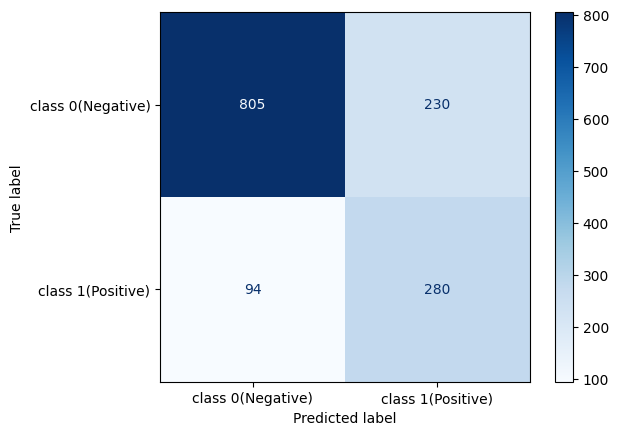

In [156]:
cm = confusion_matrix(y_test, y_pred_custom_threshold)
display_labels = ["class 0(Negative)", "class 1(Positive)"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [157]:
importance = pd.DataFrame({
    'Feature' : x_train.columns,
    'Weight' : model.coef_[0],
    'Odds_ratio' : np.exp(model.coef_[0])
}).sort_values(by = 'Weight', ascending = False) 

print(importance)

                           Feature    Weight  Odds_ratio
17     InternetService_Fiber optic  1.059671    2.885423
22           PaymentMethod_E-Check  0.383548    1.467482
9                  StreamingMovies  0.375484    1.455696
10                PaperlessBilling  0.352356    1.422416
8                      StreamingTV  0.350641    1.419978
16               MultipleLines_Yes  0.345347    1.412480
12                     is_anchored  0.327736    1.387823
14                 SeniorCitizen_1  0.145917    1.157100
0                          Partner  0.042544    1.043462
6                 DeviceProtection  0.039320    1.040103
13                     gender_Male  0.033445    1.034011
21                PaymentMethod_CC -0.003969    0.996038
23            PaymentMethod_M-Chec -0.011851    0.988219
15  MultipleLines_No phone service -0.091566    0.912501
5                     OnlineBackup -0.108504    0.897175
1                       Dependents -0.212307    0.808716
2                           ten

Fiber optics is our biggest churn risk factor with an odds ratio of ~2.9 whereas being on a two year contract is our biggest churn saver 

In [168]:
churn = df[df['Churn'] == 'Yes']
churn['MonthlyCharges'].mean()

np.float64(74.44133226324237)

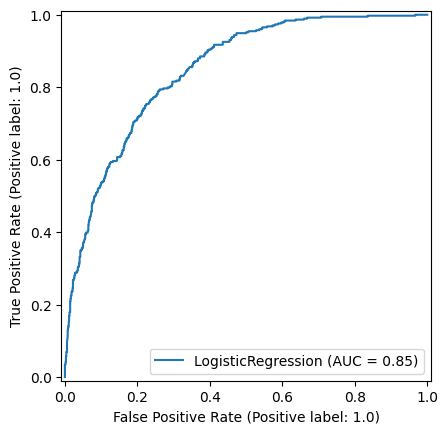

In [188]:
from sklearn.metrics import RocCurveDisplay, roc_curve, PrecisionRecallDisplay
RocCurveDisplay.from_estimator(model, x_test,y_test)


ROC_AUC = 0.85

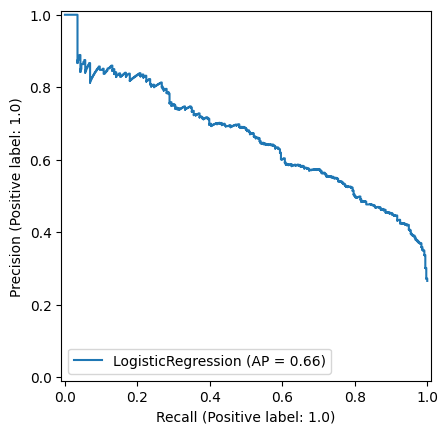

In [190]:
display = PrecisionRecallDisplay.from_estimator(model, x_test, y_test)

AP = 0.66